In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
from backtest_utils import TradingSimulator
import pickle

In [3]:
# #Update data for all stocks. Function needs to be fixed before you can run it.
# SAU.load_and_update_stock_data()

In [4]:
strategy_name = 'dumb_strategy'
TS = TradingSimulator(strategy_name)

NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


In [5]:
# Dump New symbols into the stock_symbols.pkl
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
symbols = []  # Example list of stock symbols
if len(symbols) > 0:
    TS.SAU.add_stock_symbols_to_pickle(symbols, stock_symbols_pickle)

In [6]:
# Load the data from 'stock_symbols.pkl' into a variable called 'symbols'
with open(stock_symbols_pickle, 'rb') as file:
    symbols = pickle.load(file)

## BACKTEST

In [7]:
# Imports
from datetime import datetime

# Optional Imports
import numpy as np
import matplotlib.pyplot as plt

In [8]:
symbols = ['HDB', 'BIIB', 'BNTX', 'MRNA', 'CHTR', 'AWK', 'SNAP', 'TFC', 'ES', 'KDP', 'HSY', 'NEE', 'TTWO', 'EL', 'JD', 'BA', 'EQNR', 'HUM', 'NTR', 'WPM', 'WPM', 'WBA', 'SBAC', 'MMM', 'BTI', 'ILMN', 'WDS', 'ADM', 'PFE', 'ALNY', 'FNV', 'NEM', 'WBD']


In [9]:
from backtest_utils import TradingSimulator
TS = TradingSimulator(strategy_name)
start_date = '2023-01-01'
end_date = '2023-12-31'
start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
rebalance_frequency = 15  # In days
# create a numpy array of numbers 15 days apart from 0 to 365
long_count = 10
short_count = 0
portfolio_starting_value = 110000
risk_pct = 0.05
reinvest_profits_bool = False

# Run the backtest
test = TS.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool)

NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


Running backtest: 2023-12-27 - 2023-12-31: 100%|██████████| 25/25 [00:00<00:00, 44.66it/s, Profit=-1.8e+3] 


In [10]:
benchmark_returns = TS.get_benchmark_returns(start_date_dt, end_date_dt, test['rebalance_periods'], portfolio_starting_value, benchmark_name='^IXIC')

In [11]:
# add a zero to the beginning of the benchmark_data to make it the same length as the backtest_profits
len(test['backtest_profits']), len(test['rebalance_periods']), len(benchmark_returns)

(25, 25, 25)

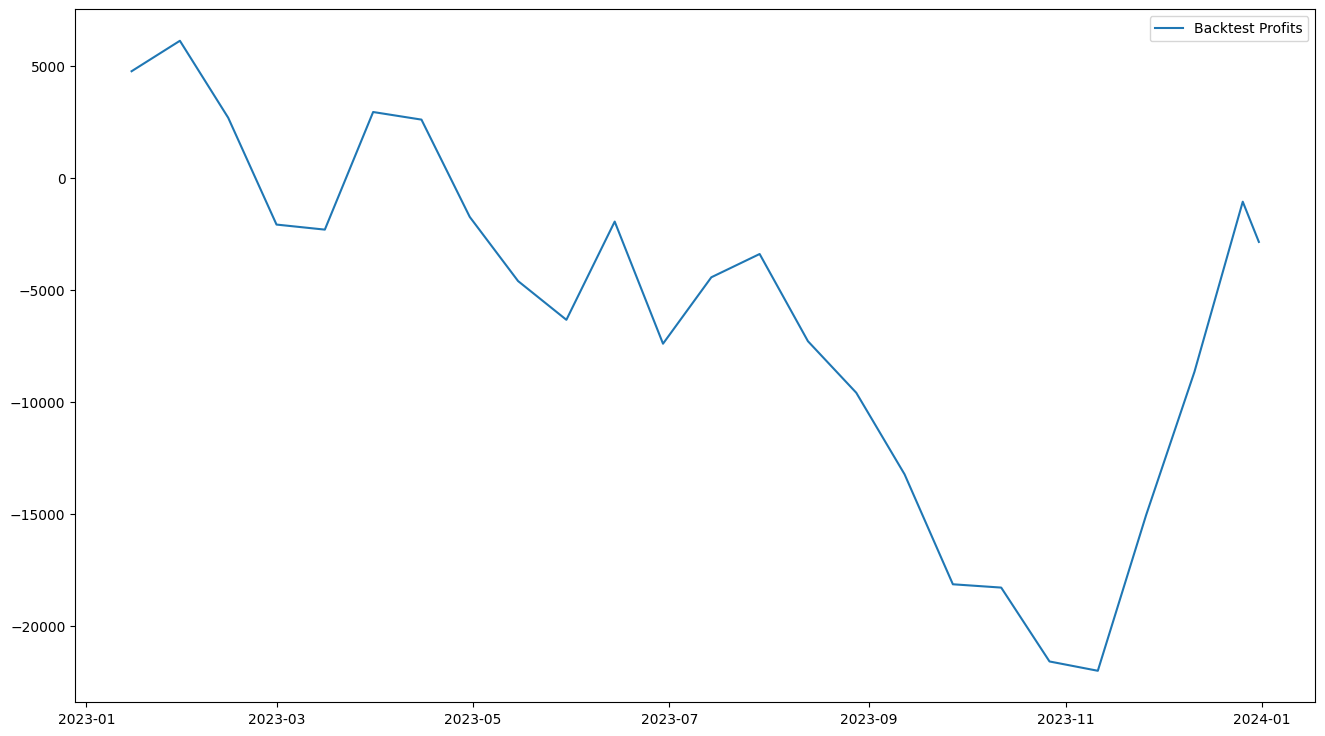

In [12]:
# Plot the backtest profits and the benchmark_data
plt.figure(figsize=(16, 9))
plt.plot(np.array(test['rebalance_periods'])[:, 1], np.cumsum(test['backtest_profits']), label='Backtest Profits')
# plt.plot(np.array(test['rebalance_periods'])[:, 1], np.cumsum(benchmark_returns), label='Nasdaq Returns')
# Show labels
plt.legend()
# Show the plot
plt.show()

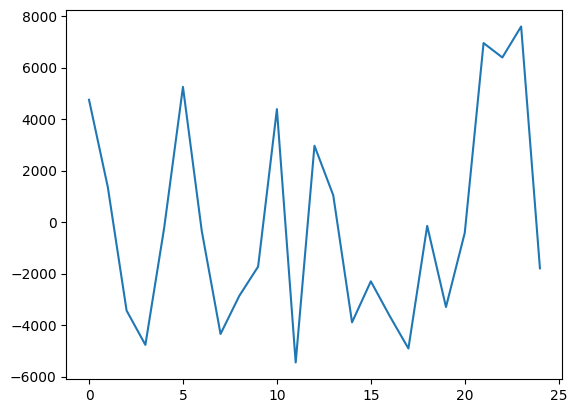

In [13]:
plt.plot(test['backtest_profits'])

# ANALYSIS STUFF

In [ ]:
# Calculating Win % for Rebalance Periods

profit_count = 0
loss_count = 0
for backtest_run in backtest_runs:
    profit = backtest_run[-1]
    for output in profit:
        output = int(np.float32(output))
        if output > 0:
            profit_count += 1
        else:
            loss_count += 1
print({'profit_count': profit_count, 'loss_count': loss_count, 'profit_pct': profit_count/(profit_count+loss_count)})

In [ ]:
# calculate the sharp ratio
# https://www.youtube.com/watch?v=vTzjk6kLw2I

# IBKR Connection

In [ ]:
from ib_insync import IB, Stock
import nest_asyncio
nest_asyncio.apply()

In [ ]:
def connect_to_IBKR():
    '''NOTE: First start the TWS or Gateway software from IBKR'''
    
    # Create an instance of the IB class
    ib = IB()

    # Connect to the IBKR TWS (Trader Workstation) or Gateway
    ib.connect('127.0.0.1', 7496, clientId=0)

    # Check if the connection is successful
    if ib.isConnected():
        print('Connected to IBKR')
    else:
        print('Failed to connect to IBKR')
    return ib

In [ ]:
def get_current_portfolio(ib):
    # Request the current portfolio from IBKR
    portfolio = ib.portfolio()
    
    # Return the portfolio
    return portfolio


In [ ]:
def get_current_price(ib):
    # Request the current market data for AAPL
    contract = ib.qualifyContracts(Stock('AAPL', 'SMART', 'USD'))
    ticker = ib.reqTickers(contract)[0]
    
    # Get the current price
    current_price = ticker.marketPrice()
    
    # Return the current price
    return current_price


In [ ]:
get_current_price(ib)